In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.xls")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


c:\Users\saras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


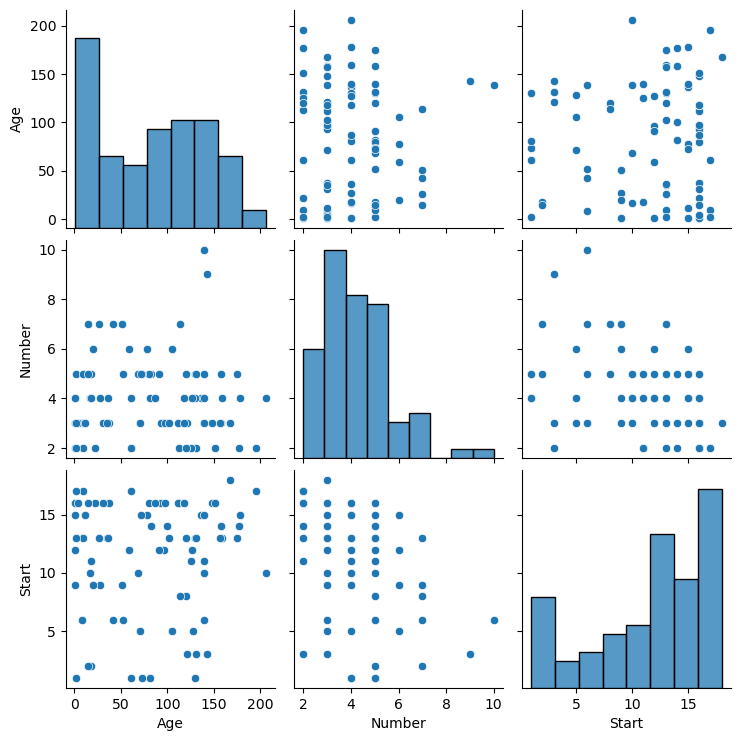

In [6]:
sns.pairplot(df)

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df = pd.get_dummies(data=df, columns=['Kyphosis'], drop_first=True)

In [9]:
df.rename(columns={"Kyphosis_present":"Kyphosis"}, inplace=True)

In [10]:
df.head()

,Age,Number,Start,Kyphosis
0,71,3,5,False
1,158,3,14,False
2,128,4,5,True
3,2,5,1,False
4,1,4,15,False


In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
sm = SMOTE(random_state=42)

In [14]:
X = df.drop("Kyphosis", axis=1)

In [15]:
y= df["Kyphosis"]

In [16]:
X_Res, y_Res = sm.fit_resample(X,y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_Res, y_Res, test_size=0.33, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [21]:
predict  = rf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90        24
        True       0.89      0.84      0.86        19

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43



In [24]:
print(confusion_matrix(y_test, predict))

[[22  2]
 [ 3 16]]


In [25]:
roc_auc_score(y_test, predict)

0.8793859649122806

In [26]:
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(random_state=42,max_depth=20)

In [29]:
dt.fit(X_train_non,y_train_non)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [30]:
preditc1 = dt.predict(X_test_non)

In [31]:
print(classification_report(y_test_non,preditc1))

              precision    recall  f1-score   support

       False       0.77      0.81      0.79        21
        True       0.20      0.17      0.18         6

    accuracy                           0.67        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.65      0.67      0.66        27



In [32]:
print(confusion_matrix(y_test_non,preditc1))

[[17  4]
 [ 5  1]]


In [33]:
roc_auc_score(y_test_non,preditc1)

0.48809523809523814